In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def setup():
    # parameter values
    p = ct.one_atm  # pressure
    tburner = 300.0  # burner temperature
    mdot = 1.2 # kg/m^2/s
    width = 0.05 # m

    gas = ct.Solution('h2o2.cti')

    # set state to that of the unburned gas at the burner
    gas.set_equivalence_ratio(0.4, 'H2', 'O2:1.0, AR:5') # unsucessful
    # gas.set_equivalence_ratio(0.6, 'H2', 'O2:1.0, AR:5') # successful solve
    gas.TP = tburner, p

    # Create the stagnation flow object with a non-reactive surface.
    sim = ct.BurnerFlame(gas=gas, width=width)
    # set the mass flow rate at the inlet
    sim.burner.mdot = mdot
    sim.set_refine_criteria(ratio=3, slope=0.16, curve=0.3, prune=0.1)
    return sim

In [3]:
sim = setup()
sim.solve(loglevel=1, auto=False)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.594e-05      5.411
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 
    to resolve AR H H2 H2O H2O2 HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.594e-05      5.659
Attempt Newton solution of steady-state problem...    success.

Problem solved on [11] point grid(s).

............................................................

    New points inserted after grid points 16 17 18 19 20 21 
    to resolve AR H H2 H2O H2O2 HO2 O O2 OH T point 17 u 
##############################################################################
refine: discarding point at 0.0103125
refine: discarding point at 0.0160938
refine: discarding point at 0.0170313
refine: discarding point at 0.019375

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05      6.022
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001442      5.937
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003649      5.281
Attempt Newton solution of steady-state problem...    success.

Problem solved on [31] point grid(s).

..............................................................................
####################################################################

Take 10 timesteps     0.0001281      6.037
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001622      5.865
Attempt Newton solution of steady-state problem...    success.

Problem solved on [32] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 24 25 26 27 28 29 30 
    to resolve AR H H2 H2O H2O2 HO2 O O2 OH T point 30 u 
##############################################################################
refine: discarding point at 0.0278125
refine: discarding point at 0.0323438
refine: discarding point at 0.0332812
refine: discarding point at 0.0345312
refine: discarding point at 0.0348437
refine: discarding point at 0.0352344
refine: discarding point at 0.0357031
refine: discarding point at 0.0361719

...........................................................

Take 10 timesteps     0.0004865      5.056
Attempt Newton solution of steady-state problem...    success.

Problem solved on [32] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 27 28 29 30 
    to resolve AR H H2 H2O H2O2 HO2 O O2 OH T point 29 u 
##############################################################################
refine: discarding point at 0.035
refine: discarding point at 0.0425
refine: discarding point at 0.044375
refine: discarding point at 0.0448438
refine: discarding point at 0.0453125
refine: discarding point at 0.0458984
refine: discarding point at 0.0461328
refine: discarding point at 0.0467188
refine: discarding point at 0.0471875

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Pr

In [4]:
sim.show_stats()


Statistics:

 Grid   Timesteps  Functions      Time  Jacobians      Time
    9          10        346    0.0051         10    0.0053
   13          10        341    0.0087         11    0.0105
   18          10        291    0.0116          8    0.0101
   22          10        304    0.0148          7    0.0125
   28          30       1252    0.0850         42    0.1129
   31          10        323    0.0216         10    0.0235
   33          30       1433    0.0986         48    0.1258
   32          20        766    0.0552         25    0.0663
   32          20        741    0.0462         23    0.0568
   33          30       1102    0.0783         39    0.1076
   31          10        413    0.0297          9    0.0230
   33          30       1009    0.0757         32    0.0904
   35          20        745    0.0500         25    0.0682
   34          20        743    0.0467         23    0.0571
   37          30       1104    0.0805         40    0.1151
   36          20        7

<IPython.core.display.Javascript object>


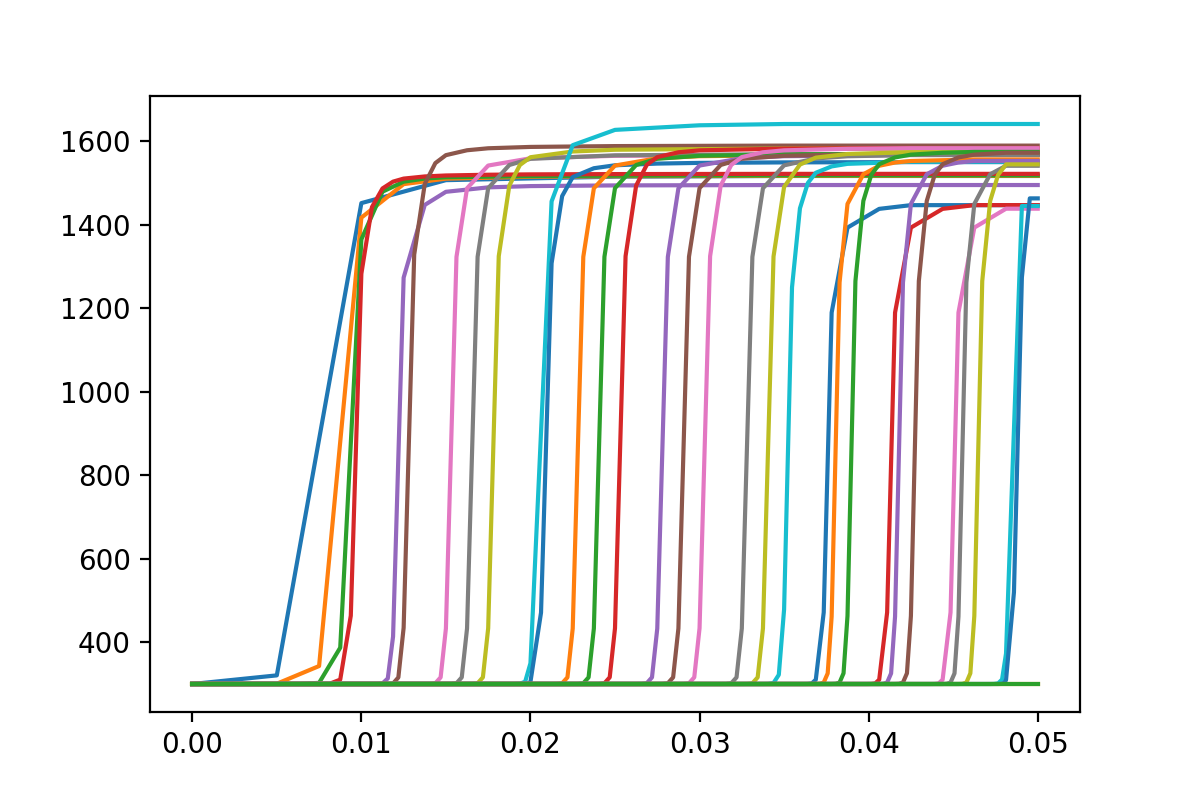

In [5]:
sim = setup()

# Use callback function to collect and plot data after each steady solve
fig,ax = plt.subplots(1,1, figsize=(6,4))
def callback(x):
    ax.plot(sim.grid, sim.T)
    fig.canvas.draw()
    return 0

sim.set_steady_callback(callback)

In [6]:
sim.solve(loglevel=0, auto=False)